# Using a different time series dataset (either from FRED or elsewhere), go about the process of time series modeling. Specifically, generate the following deliverables:

In [1]:
#!pip install yfinance
#!pip install plotly

In [2]:
import numpy as np
import pandas as pd
import scipy
import plotly.express as px
from datetime import datetime
import datetime as dt
import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import pacf, acf
from statsmodels.tsa.arima_model import ARIMA

import yfinance as yf

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [3]:
def ilinechart(df, x, y, groups=None, title=''):
    fig = px.line(df, x=x, y=y, color=groups, title=title, 
                  template='none').update(layout=dict(title=dict(x=0.5)))
    
    fig.show()

In [4]:
# amazon = pd.read_csv('data/AMZN_data.csv')
# amazon.head()

In [5]:
amazon = yf.download('AMZN', start='2013-01-01',end='2020-04-05',interval='1d')
amazon.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-02,256.079987,258.100006,253.259995,257.309998,257.309998,3271000
2013-01-03,257.269989,260.880005,256.369995,258.480011,258.480011,2750900
2013-01-04,257.579987,259.799988,256.649994,259.149994,259.149994,1874200
2013-01-07,262.970001,269.730011,262.670013,268.459991,268.459991,4910000
2013-01-08,267.070007,268.980011,263.570007,266.380005,266.380005,3010700


# Plot the time series, along with any logical or necessary differences to get a stationary dataset.

In [6]:
amazon['diff'] = amazon['Close'] - amazon['Close'].shift()
amazon = amazon.dropna()

# Generate and interpret a PACF for the time series (and/or its differences).

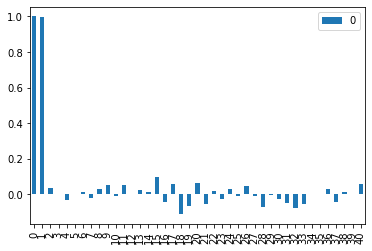

In [7]:
x_acf = pd.DataFrame(pacf(amazon['Close']))
x_acf.plot(kind='bar')

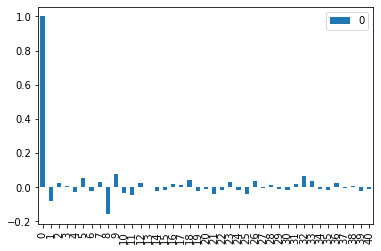

In [8]:
x_acf = pd.DataFrame(acf(amazon['Close'].diff().dropna()))
x_acf.plot(kind='bar')

# Generate five ARIMA specifications and evaluate their efficacy at modeling your data.

In [9]:
model = ARIMA(amazon['Close'], order=(6,1,3))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1825
Model:                 ARIMA(6, 1, 3)   Log Likelihood               -8110.081
Method:                       css-mle   S.D. of innovations             20.592
Date:                Sun, 08 Nov 2020   AIC                          16242.162
Time:                        16:56:45   BIC                          16302.764
Sample:                             1   HQIC                         16264.517
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.9066      0.368      2.464      0.014       0.186       1.628
ar.L1.D.Close    -0.6569      0.141     -4.671      0.000      -0.933      -0.381
ar.L2.D.Close     0.7156      0.105     

In [10]:
model = ARIMA(amazon['diff'], order=(1,0,1))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

                              ARMA Model Results                              
Dep. Variable:                   diff   No. Observations:                 1826
Model:                     ARMA(1, 1)   Log Likelihood               -8131.327
Method:                       css-mle   S.D. of innovations             20.783
Date:                Sun, 08 Nov 2020   AIC                          16270.654
Time:                        16:56:47   BIC                          16292.693
Sample:                             0   HQIC                         16278.783
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9038      0.454      1.992      0.046       0.015       1.793
ar.L1.diff    -0.2099      0.213     -0.987      0.324      -0.627       0.207
ma.L1.diff     0.1286      0.215      0.597      0.5

In [11]:
model = ARIMA(amazon['Close'], order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1825
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -8127.374
Method:                       css-mle   S.D. of innovations             20.789
Date:                Sun, 08 Nov 2020   AIC                          16262.747
Time:                        16:56:47   BIC                          16284.784
Sample:                             1   HQIC                         16270.876
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.9037      0.454      1.991      0.047       0.014       1.793
ar.L1.D.Close    -0.2098      0.213     -0.986      0.324      -0.627       0.207
ma.L1.D.Close     0.1286      0.215     

In [12]:
model = ARIMA(amazon['Close'], order=(5, 1, 5))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1825
Model:                 ARIMA(5, 1, 5)   Log Likelihood               -8103.810
Method:                       css-mle   S.D. of innovations             20.493
Date:                Sun, 08 Nov 2020   AIC                          16231.620
Time:                        16:57:09   BIC                          16297.732
Sample:                             1   HQIC                         16256.008
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.9064      0.464      1.953      0.051      -0.003       1.816
ar.L1.D.Close    -1.2178      0.360     -3.387      0.001      -1.922      -0.513
ar.L2.D.Close    -0.2888      0.223     

In [13]:
model = ARIMA(amazon['Close'], order=(1, 2, 1))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

                             ARIMA Model Results                              
Dep. Variable:               D2.Close   No. Observations:                 1824
Model:                 ARIMA(1, 2, 1)   Log Likelihood               -8127.188
Method:                       css-mle   S.D. of innovations             20.794
Date:                Sun, 08 Nov 2020   AIC                          16262.376
Time:                        16:57:11   BIC                          16284.412
Sample:                             2   HQIC                         16270.505
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0006      0.001      0.648      0.517      -0.001       0.002
ar.L1.D2.Close    -0.0807      0.023     -3.459      0.001      -0.126      -0.035
ma.L1.D2.Close    -1.0000      0.002

# Finally, choose one specification and make a case for it as a logical model for your dataset.

In [14]:
# indx = amazon.set_index('Date')
df = amazon['Close']
df

Date
2013-01-03     258.480011
2013-01-04     259.149994
2013-01-07     268.459991
2013-01-08     266.380005
2013-01-09     266.350006
                 ...     
2020-03-30    1963.949951
2020-03-31    1949.719971
2020-04-01    1907.699951
2020-04-02    1918.829956
2020-04-03    1906.589966
Name: Close, Length: 1826, dtype: float64

In [15]:
split_date='2017-02-01'
train_df=amazon['Close'][:split_date]
train_df

Date
2013-01-03    258.480011
2013-01-04    259.149994
2013-01-07    268.459991
2013-01-08    266.380005
2013-01-09    266.350006
                 ...    
2017-01-26    839.150024
2017-01-27    835.770020
2017-01-30    830.380005
2017-01-31    823.479980
2017-02-01    832.349976
Name: Close, Length: 1028, dtype: float64

In [16]:
test_df = amazon['Close'][split_date:]
test_df

Date
2017-02-01     832.349976
2017-02-02     839.950012
2017-02-03     810.200012
2017-02-06     807.640015
2017-02-07     812.500000
                 ...     
2020-03-30    1963.949951
2020-03-31    1949.719971
2020-04-01    1907.699951
2020-04-02    1918.829956
2020-04-03    1906.589966
Name: Close, Length: 799, dtype: float64

Text(0.5, 1.0, 'Histogram of Residuals')

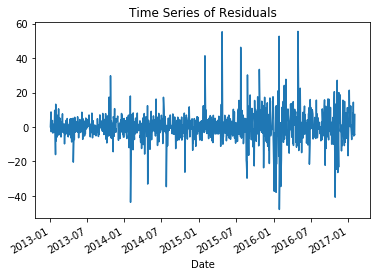

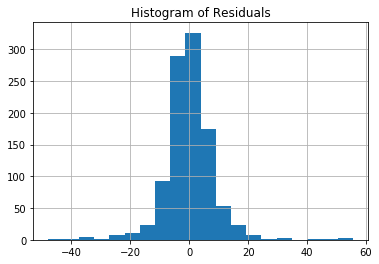

In [17]:
model = ARIMA(train_df, order=(6, 1, 3))
model_fit = model.fit()

residuals = pd.DataFrame(model_fit.resid)

residuals.plot(legend=False)
plt.title('Time Series of Residuals')

residuals.hist(bins=20)
plt.title('Histogram of Residuals')

In [18]:
len(test_df)

799

In [21]:
# arma_predictions_fb = arma_fitted_fb.predict(start=len(fcb_close[:-50]), 
#                                    end=len(fcb_close[:-50])+len(fcb_close[-50:])-1,dynamic=False)

In [22]:
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1027
Model:                 ARIMA(6, 1, 3)   Log Likelihood               -3690.286
Method:                       css-mle   S.D. of innovations              8.779
Date:                Sun, 08 Nov 2020   AIC                           7402.572
Time:                        16:58:15   BIC                           7456.851
Sample:                             1   HQIC                          7423.175
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.5597      0.261      2.144      0.032       0.048       1.071
ar.L1.D.Close    -0.5002      0.158     -3.158      0.002      -0.811      -0.190
ar.L2.D.Close    -0.7276      0.060    -

In [23]:
model_fit.predict(start=len(train_df), 
              end=len(train_df)+len(test_df)-1,dynamic=False)


1027    3.068100
1028    1.557632
1029   -2.163071
1030   -0.761233
1031    2.531373
          ...   
1821    0.512351
1822    0.511881
1823    0.591510
1824    0.617096
1825    0.546267
Length: 799, dtype: float64